In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os



2024-06-09 20:07:24.499250: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-09 20:07:24.526363: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 20:07:24.901385: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:

# Define the mapping dictionary
categories_emotions = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
categories_gender = {0: 'man', 1: 'woman'}

# Load the pre-trained models
model_emotions = tf.keras.models.load_model('/home/thor_01/Documents/EC/tensorflow/transfer-learning-emotions/trainined_models/emotions_VGG_v2.h5')
model_gender = tf.keras.models.load_model('/home/thor_01/Documents/EC/tensorflow/transfer-learning-emotions/trainined_models/gender_VGG_v2.h5')

def detect_faces_and_classify(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Load the Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # Crop the face
        face = gray[y:y+h, x:x+w]
        # Resize the face to 48x48
        face_resized = cv2.resize(face, (48, 48))
        # Normalize the face
        face_resized = face_resized / 255.0
        # Add channel and batch dimensions
        face_resized = np.expand_dims(face_resized, axis=-1)
        face_resized = np.expand_dims(face_resized, axis=0)
        
        # Predict emotion
        prediction_emotion = model_emotions.predict(face_resized)
        emotion_idx = np.argmax(prediction_emotion)
        emotion_label = categories_emotions[emotion_idx]

        # Predict gender
        prediction_gender = model_gender.predict(face_resized)
        gender_idx = 1 if prediction_gender > 0.5 else 0
        gender_label = categories_gender[gender_idx]

        # Draw rectangle around the face
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        # Put emotion label text above the rectangle
        cv2.putText(image, f"{emotion_label}, {gender_label}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()

1/1 [==============================] - 0s 9ms/step


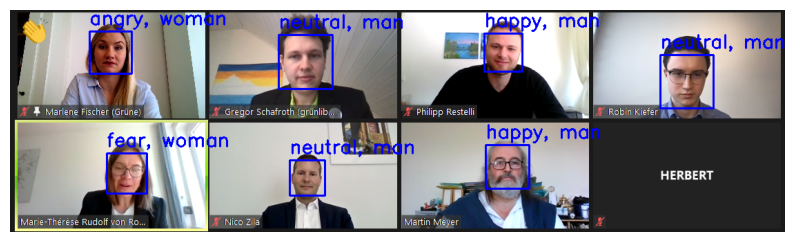

In [11]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/transfer-learning-emotions/test_images/BBZ-1123x0-c-default.png'
detect_faces_and_classify(image_path)

1/1 [==============================] - 0s 10ms/step


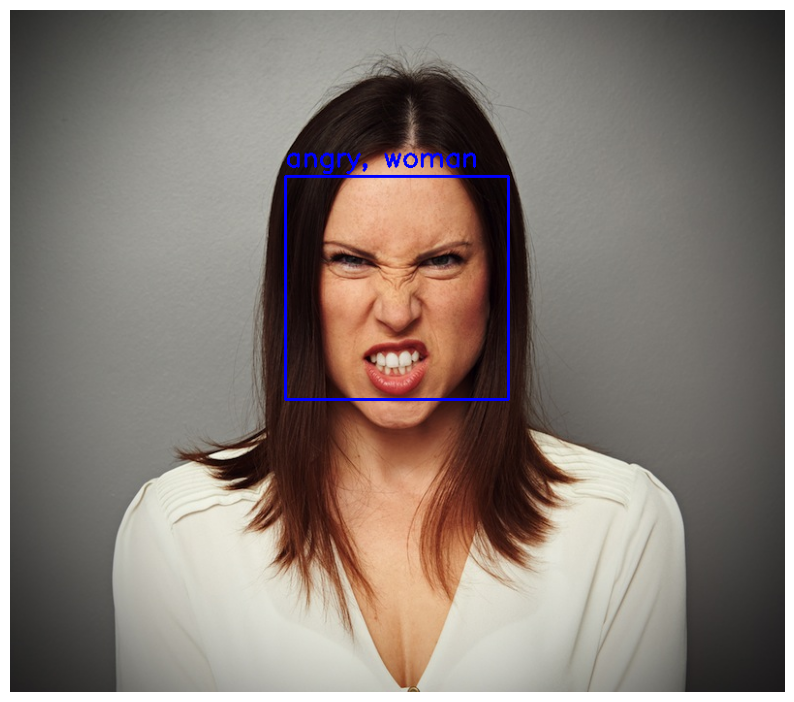

In [12]:
image_path = '/home/thor_01/Documents/EC/tensorflow/transfer-learning-emotions/test_images/DMUbjq2UjJcG3umGv3Qjjd.jpeg'
detect_faces_and_classify(image_path)

1/1 [==============================] - 0s 10ms/step


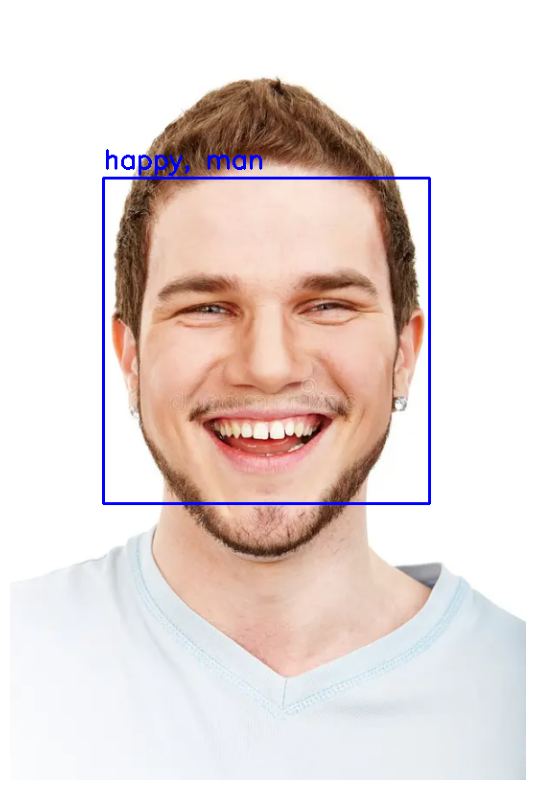

In [13]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/transfer-learning-emotions/test_images/happy4.png'
detect_faces_and_classify(image_path)

1/1 [==============================] - 0s 9ms/step


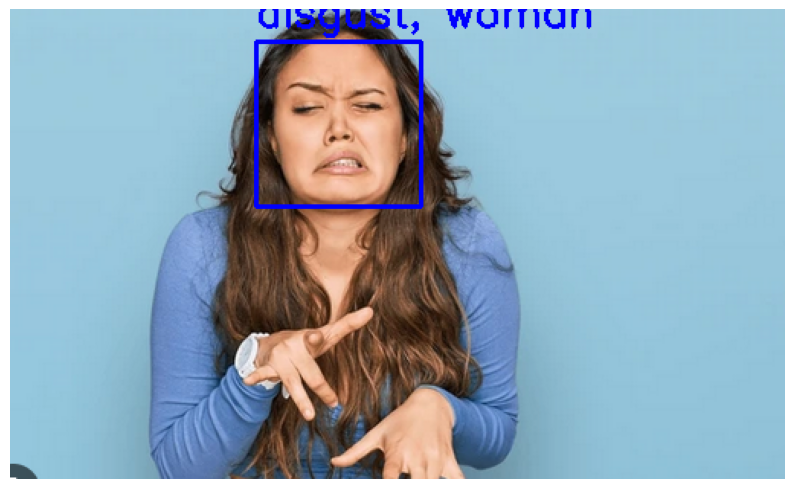

In [28]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/transfer-learning-emotions/test_images/woman2.png'
detect_faces_and_classify(image_path)

1/1 [==============================] - 0s 10ms/step


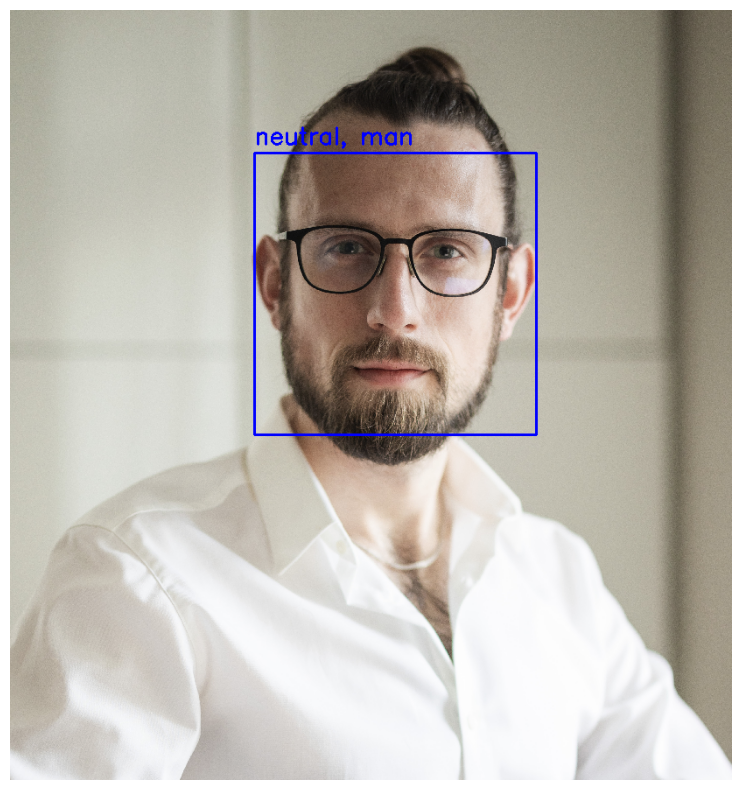

In [31]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/transfer-learning-emotions/test_images/sthor.png'
detect_faces_and_classify(image_path)